**MATH 3332 **

**Section 52 **

# In Who-is-Normal.xslx there are 7 columns representing variables x1-x7, one of which is sample from the normal distribution. Find which one of the variables is normal?

## Reading in Values

The program starts by reading in the values from the Excel spreadsheet after they have been exported to a CSV format.

In [21]:
import pandas as pd
df = pd.read_csv('input.csv')

print df.head()
print df.tail()

         X1        x2        x3        x4        x5        x6        x7
0  1.581231  0.546005  0.810202  0.689352  3.515645  1.031534  0.209295
1  6.119016  0.318288  0.706446  0.760674  2.081079  0.175495  0.117028
2  0.324481  0.408551  0.072050  0.997406  2.561837  0.003824  0.330540
3  1.505153  0.137457  0.810792  0.688925  1.372325  1.271651  0.172976
4  4.550754  0.347941  0.814213  0.686441  2.228135  0.073911  0.251704
           X1        x2        x3        x4        x5        x6        x7
94   0.194444  0.550095  0.823812  0.679429  3.548913  1.100219  0.050160
95   2.036295  0.362910  0.870428  0.644500  2.306271  0.037531  0.306529
96   2.113275  0.530917  0.160620  0.987128  3.395604  0.802106  0.233305
97  15.886622  0.458636  0.929318  0.598381  2.874989  0.140617  0.375170
98   2.530715  0.359756  0.938441  0.591046  2.289578  0.044277  0.317482


## Creating the Probability Plot

The program then creates a plot for each distribution using the **scipy.stats** library. The plot contains the **plotted values**, the $R^2$ value, the **mean**, and the **standard deviation **.

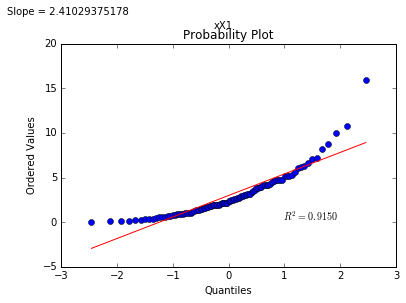

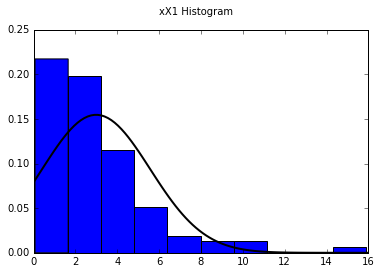

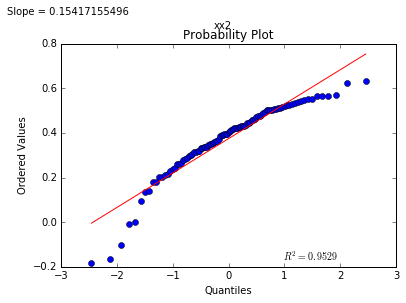

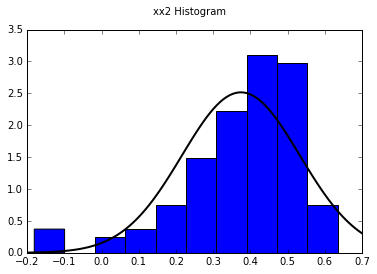

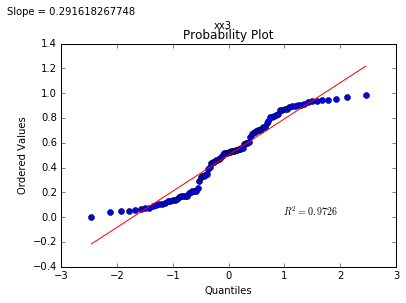

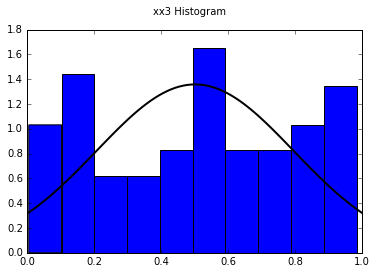

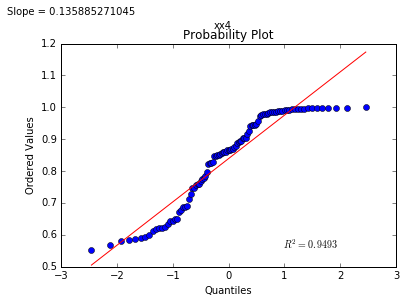

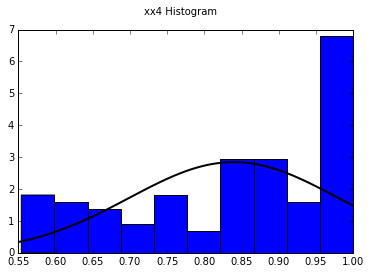

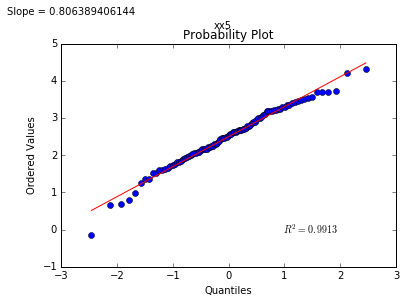

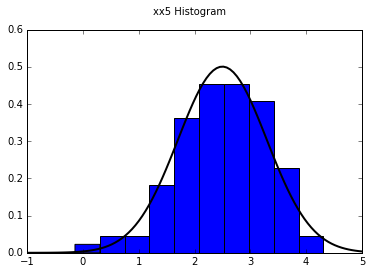

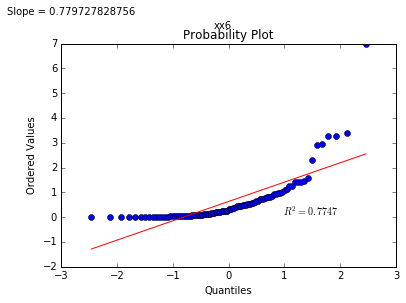

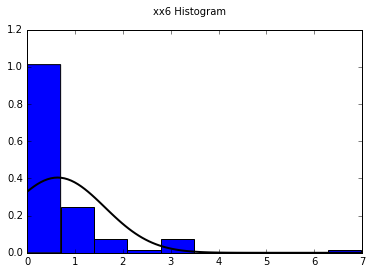

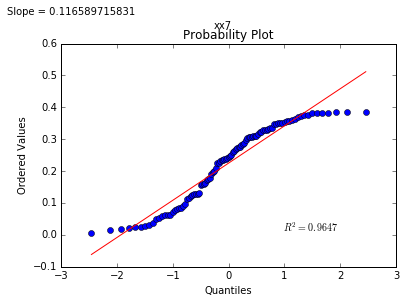

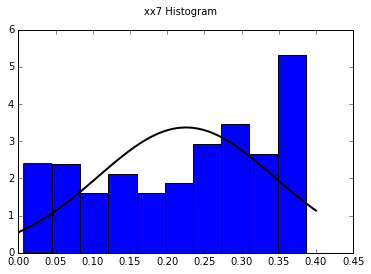

In [15]:
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid
import numpy as np
%matplotlib inline

# Iterate over each dataset (x1, x2, etc)
for key in df.keys():
    
    # Create array of float-type values from the dataset
    values = df[key]
    
    # Create a seperate figure to create the probability plot
    fig = plt.figure()
    fig.suptitle('x%s' % key)
    # Produce the probability plot
    res = scipy.stats.probplot(values, plot=plt)
    fig.text(0, 1, 'Slope = %s' % res[1][0])
    
    # Create a separate figure to create the histogram
    fig2 = plt.figure()
    fig2.suptitle('x%s Histogram' % key)
    # Produce the histogram using normalized values
    plt.hist(values, normed=True)
    
    # Add the normal distribution curve to the plot
    mu, std = scipy.stats.norm.fit(values)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = scipy.stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

plt.show()

## Answer

x5 is the normal distribution with an $R^2$ value of 0.9913, which is greater than any of the other distributions. 

Graphically, it can be seen in the histogram that it best fits the normal distribution curve as well. The other graphs do not fit the normal distribution curve, or they do not fit as well as x5.

## References
http://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data

http://matplotlib.org/api/pyplot_api.html